In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

import search_engine

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# function for question 4 and 5
from Function import *

import string

## Question 2

### Question 2.1 

Given the tsv file we obtain from the parsing, we are going now to build the related vocabulary.

In [ ]:
file = '../data_in/Books.tsv'
vocab = '../data_out/vocab.json'
data_file = '../data_in/Books_processed.csv'
is_read_file = True # change to False to build from scratch

s = search_engine.SearchEngine(
    stemmer=SnowballStemmer(language='english'), 
    tokenizer=word_tokenize)

if is_read_file:
    # read from files
    df = pd.read_csv(data_file)
    df['Plot_tokens'] = df['Plot_tokens'].str.replace('[', '').replace(']', '').apply(lambda x: x.split(','))
    s.add_data_fname(file)
    s.load_vocab(vocab)
else:
    # building inverted index
    is_all_ok, df = s.build_inverted_index(file)

    # save vocabulary file 
    s.dump_vocab(vocab)

#### Executing the query

Just let us know what you are willing to search!!!

In [ ]:
# query and render results
q = input()
results = s.conjunctive_search(q)
results = pd.DataFrame(results, columns=['bookId'])
s.render_results(results, query=q)

survival games


You can clearly see that we have retrieved the documents connected to your query!


Please, if you need more information about any of the found books, do not hesitate to click on the book title and get directly to the page of the book.

### Question 2.2 (TF-IDF)

In this initial step we are going to take the relevant files and build the vocabulary.

In [ ]:
file = '../data_in/Books.tsv'
vocab = '../data_out/vocab.json'
data_file = '../data_in/Books_processed.csv'
is_read_file = True

s = search_engine.SearchEngine(
    stemmer=SnowballStemmer(language='english'), 
    tokenizer=word_tokenize)

In [ ]:
if is_read_file:
    # read from files
    df = pd.read_csv(data_file)
    df['Plot_tokens'] = df['Plot_tokens'].str.replace('[', '').replace(']', '').apply(lambda x: x.split(','))
    s.add_data_fname(file)
    s.load_vocab(vocab)
else:
    # building inverted index
    is_all_ok, df = s.build_inverted_index(file)

    # save vocabulary file 
    s.dump_vocab(vocab)

In [ ]:
"""
With this function we are going to fund the list of documents considering the score of each one.
"""
def search_by_score(query, df, variants):
    q_vect = vect.transform([query])
    d = df[df['bookId'].isin(variants)].copy()
    d['sim'] = d['tf_idf'].apply(lambda x: cosine_similarity(x, q_vect).flatten()[0])
    results = d.sort_values(by='sim', ascending=False)[:10][['bookId', 'sim']]
    return results

In [ ]:
vect = TfidfVectorizer()
dataset = vect.fit_transform(df['Plot_tokens'].apply(lambda x: ' '.join([w for w in x])))
df['tf_idf'] = [x for x in dataset]

query = input()

variants = s.conjunctive_search(query)
results = search_by_score(query, df, variants)

survival games


The *output* will consist in a list of the books with the highest cosine score in relation to the input query.

In [ ]:
s.render_results(results, query=query, at_k=5)

## Question 4

In [ ]:
books = pd.read_csv("Books.tsv", sep='\t', encoding= 'utf-8')

In [ ]:
books.head()

,bookId,bookTitle,bookSeries,bookAuthors,ratingValue,ratingCount,reviewCount,Plot,NumberofPages,PublishingDate,Characters,Settings,url
0,1,The Hunger Games,(The Hunger Games #1),Suzanne Collins,4.33,6414062.0,172642.0,"Could you survive on your own in the wild, wit...",374.0,September 14th 2008,"Katniss Everdeen, Peeta Mellark, Cato, Primros...","District 12, Panem, Capitol, Panem, Panem",https://www.goodreads.com/book/show/2767052-th...
1,2,Harry Potter and the Order of the Phoenix,(Harry Potter #5),"J.K. Rowling, Mary GrandPré",4.50,2527943.0,42800.0,There is a door at the end of a silent corrido...,870.0,September 2004,"Sirius Black, Draco Malfoy, Ron Weasley, Petun...","Hogwarts School of Witchcraft and Wizardry, Lo...",https://www.goodreads.com/book/show/2.Harry_Po...
2,3,To Kill a Mockingbird,(To Kill a Mockingbird),Harper Lee,4.28,4531861.0,91898.0,The unforgettable novel of a childhood in a sl...,324.0,May 23rd 2006,"Scout Finch, Atticus Finch, Jem Finch, Arthur ...","Maycomb, Alabama",https://www.goodreads.com/book/show/2657.To_Ki...
3,4,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen",4.26,3021022.0,67901.0,Alternate cover edition of ISBN 9780679783268 ...,279.0,October 10th 2000,"Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabet...","United Kingdom, Derbyshire, England, England, ...",https://www.goodreads.com/book/show/1885.Pride...
4,5,Twilight,(The Twilight Saga #1),Stephenie Meyer,3.60,4994449.0,104981.0,About three things I was absolutely positive. ...,501.0,September 6th 2006,"Edward Cullen, Jacob Black, Laurent, Renee, Be...","Forks, Washington, Phoenix, Arizona, Washingto...",https://www.goodreads.com/book/show/41865.Twil...


In the below cell, we can see that we have a great number of null values for the bookSeries column.
We decided to drop these rows.

In [ ]:
books.isna().sum()

bookId                0
bookTitle            20
bookSeries        16662
bookAuthors          20
ratingValue          20
ratingCount          20
reviewCount          20
Plot                598
NumberofPages      1158
PublishingDate      788
Characters        20348
Settings          21919
url                   0
dtype: int64

In [ ]:
books = books.dropna(subset=['bookSeries'])
books.reset_index(inplace = True, drop = True)

In order to not consider the single books that contain in them an entire book series (eg The Hunger Games #1-3), we are going to use the **check_single_book** function to detect them and assigning to them a 0 value in the *uniqueBookFlag* column, while a value of 1 will be assigned to the books we will want to consider.

In [ ]:
books.bookSeries = books.bookSeries.apply(lambda x: replace_all(x,['(', ')']))
books['uniqueBookFlag'] = books.bookSeries.apply(lambda x: check_single_book(x))
books = books[books.uniqueBookFlag == 1]
# standardize the book Series names
books.bookSeries = books.bookSeries.apply(lambda x: clean_series(x))

We select only the book that are written in english as requested.

In [ ]:
books['lang'] = books['Plot'].apply(detect_stable)
books = books[books.lang == 'en']
books.reset_index(inplace = True, drop = True)

We decided to select only the series composed of more than one book otherwise the visualization will not be effective.


In [ ]:
books['nrBooksPerSeries'] = books.bookSeries.apply(lambda x: nrBooksPerSeries(books, x))
books = books.loc[(books.nrBooksPerSeries) > 1]

We decided to pick the first ten book in order of appearence by computing the mean on the appereance value of the entire series.

In [ ]:
books['bookOrderAppearance'] = [i+1 for i in books.index]

In [ ]:
books.groupby(['bookSeries'], as_index = False).agg({'bookOrderAppearance': 'mean'})\
.sort_values(by = 'bookOrderAppearance')[['bookSeries', 'bookOrderAppearance']][:10]

,bookSeries,bookOrderAppearance
37,Adventures of Tom and Huck,29.000000
1796,The Infernal Devices,66.333333
610,Fifty Shades,114.000000
1839,The Lord of the Rings,148.000000
1873,The Mortal Instruments,151.166667
802,"Hush, Hush",194.750000
1655,The Chronicles of Narnia Publication Order,202.500000
809,If I Stay,205.500000
1882,The Notebook,211.000000
1970,The Six of Crows Trilogy,229.000000


In [ ]:
#collecting the first ten book series
Series = books.groupby(['bookSeries'], as_index = False).agg({'bookOrderAppearance': 'mean'})\
.sort_values(by = 'bookOrderAppearance').bookSeries[:10].values

In [ ]:
book_analysis = books[books.bookSeries.isin(Series)].copy()

In [ ]:
# processing year -> transforming to a dt value and considering only the year
book_analysis.PublishingDate = book_analysis.PublishingDate.apply(pd.to_datetime)
book_analysis.PublishingDate = book_analysis.PublishingDate.apply(lambda x: x.year)
# computing the difference between the min value in the column and every single other year present
book_analysis.PublishingDate = book_analysis.PublishingDate - book_analysis.PublishingDate.min()

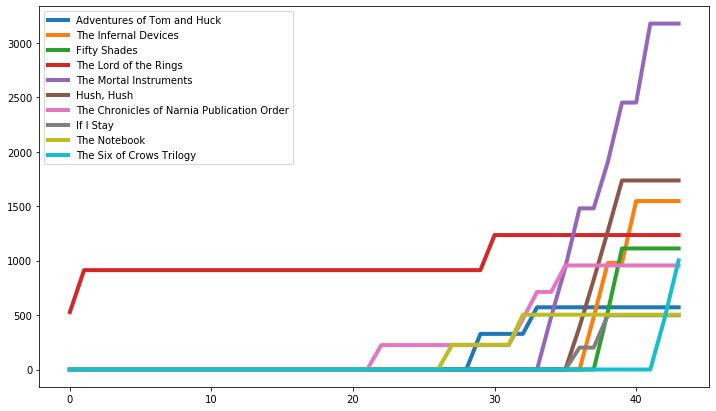

In [ ]:
Plot_Cumulative_page(Series, book_analysis)

We can easily visualize that *The Mortal Instruments* is the series with the highest value of cumulative series page count between the considered book series. The writer wrote definetly a lot!!!

# 5. Algorithmic question

In order to answer the problem we are going to confront the string S with the a string composed of all the letters in the alphabet. Both strings are going to be uppercased in order to confront them.

In [ ]:
alphabet_string = string.ascii_uppercase
S ="CADFECEILGJHABNOPSTIRYOEABILCNR"

In [ ]:
alphabet_string

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

Lets see some short string examples and how much time they need to be computed:

In [ ]:
%%time
s1 ="CADFECE"
max_lcs(s1)

Wall time: 1.24 s


3

In [ ]:
%%time
s3 ="CADFECEILGJH"
max_lcs(s3)

Wall time: 9min 17s


5

In [ ]:
%%time
s4 = "ABCD"
max_lcs(s4)

Wall time: 15 ms


4

In [ ]:
%%time
s5 = "ZYX"
max_lcs(s5)

Wall time: 0 ns


1

Given that we will show how the running time of the algorithm is exponential, we can already say that if the string's lenght is longer than **10** (s3, time: 9min 17 s ) it will not terminate in a reasonable amount of time.

PS: if you are willing to wait a non-reasonable amount of time we will leave here the function call on the entire string S which has a lenght of 32. Good luck!

In [ ]:
max_lcs(S)

### Exponential time?

We will now show that the algorithm has an exponential running time on a log-scaled plot.
For this reason the exponentiality will be stated if the plot will show a straight line.

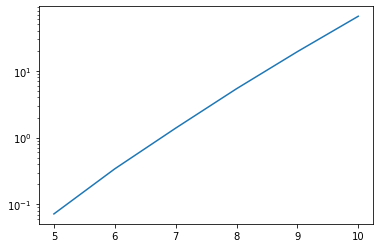

In [ ]:
exp_plot(S)

## Dynamic Programming algorithm

We will now compute the same results using dynamic programming. 

Dynamic programming amounts to breaking down an optimization problem into simpler sub-problems, and storing the solution to each sub-problem so that each sub-problem is only solved once.


### Examples

In [ ]:
%%time
lcs_DP(s1)

Wall time: 0 ns


3

In [ ]:
%%time
lcs_DP(s3)

Wall time: 0 ns


5

In [ ]:
%%time
lcs_DP(alphabet_string)

Wall time: 996 µs


26

In [ ]:
%%time
lcs_DP(alphabet_string[::-1])

Wall time: 0 ns


1

We can now see how using dynamic programming also a very long string like S can be computed in a very reasonable amount of time:

In [ ]:
%%time
lcs_DP(S)

Wall time: 0 ns


11

### Running time of a dynamic programming algorithm

Using Dynamic Programmin the running time will be polynomial of O(m*n).

In this specific case, given the fact that one of the two strings we are considering will be fixed to be **alphabet_string**, the running time of the algorithm will depend only on the lenght of the string S we are going to give in input.

We can have a direct grasp of this by calling the following function **matrix** on different strings and see directly that the number of rows will be unchanged, while the number of columns will change accordingly to the lenght of S.

## printing the DP table on a matrix - to show the computations done

In [ ]:
matrix_ = matrix(alphabet_string,S)

for row in matrix_:
    print(row)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]
[0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]
[0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[0, 1, 1, 2, 3, 3, 3, 3, 4, 4,

In [ ]:
matrix_ = matrix(alphabet_string,S[:5])

for row in matrix_:
    print(row)

[0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1]
[0, 1, 1, 2, 2, 2]
[0, 1, 1, 2, 2, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
[0, 1, 1, 2, 3, 3]
